In [31]:
import pandas
import matplotlib.pyplot as plt
import pickle
import wntr
from testWN import testWN as twm
import numpy as np
import pandas as pd

In [20]:
%matplotlib notebook

# Water Network

In [21]:
inp_file = '../Networks/BWCNdata/c-town_true_network.inp'
ctown = twm(inp_file)

Get network information:

In [87]:
nodes = ctown.getNodeName()
links = ctown.getLinkName()
pump_df = pd.DataFrame(np.ones(len(links[0])).reshape(1,-1), columns=links[0])
valves_df = pd.DataFrame(np.ones(len(links[2])).reshape(1,-1), columns=links[2])

<IPython.core.display.Javascript object>


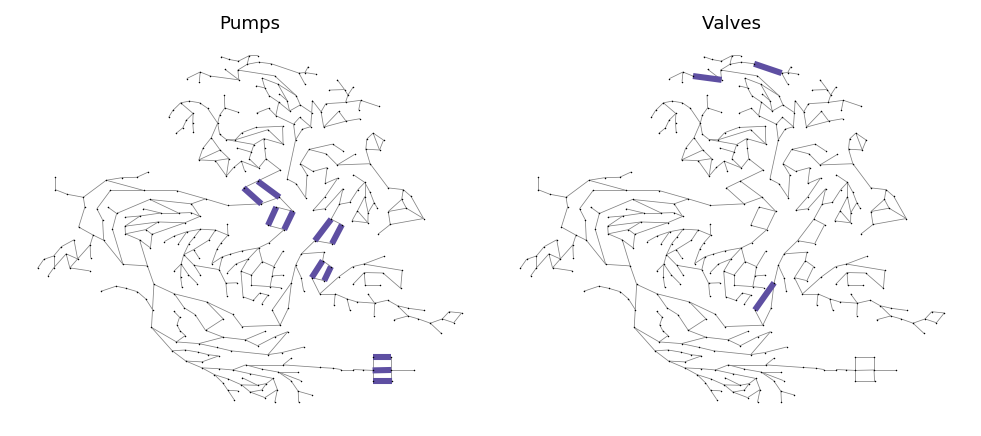

In [93]:
fig_nw, ax_nw = plt.subplots(1,2, figsize=(9,4))
wntr.graphics.plot_network(ctown.wn, link_attribute=pump_df.loc[0],node_size=1, link_width=4, add_colorbar=False, title='Pumps', ax=ax_nw[0])
wntr.graphics.plot_network(ctown.wn, link_attribute=valves_df.loc[0],node_size=1, link_width=4, add_colorbar=False, title='Valves', ax=ax_nw[1])
fig_nw.tight_layout()

# Results

In [4]:
with open('results.pkl', 'rb') as f:
    results=pickle.load(f)

In [5]:
results.node.keys()

dict_keys(['demand', 'head', 'pressure', 'quality'])

In [6]:
results.node['head']

name,J511,J411,J414,J415,J416,J417,J418,J419,J310,J311,...,J317,J323,R1,T3,T1,T7,T6,T5,T2,T4
0,135.064590,73.834930,68.621651,149.819778,142.079483,66.946884,66.135254,65.684570,105.905228,105.919243,...,113.082970,113.082970,59.0,115.899994,74.500000,104.500000,106.699997,106.800003,65.500000,135.000000
3600,135.581146,74.413437,69.113403,152.262955,144.849686,67.360413,66.500412,65.984291,106.744690,106.756683,...,114.044571,114.044571,59.0,116.375122,74.238770,105.113388,106.986923,107.464043,65.678970,135.313065
7200,136.190048,74.649979,69.411339,152.013947,144.517746,67.648956,66.779076,66.248940,108.624542,108.637810,...,118.391174,118.391174,59.0,116.896309,74.111732,106.129150,107.000000,108.109650,65.917755,136.011292
10800,136.885147,75.001816,69.754341,153.816193,146.553955,67.979202,67.100769,66.548988,104.931412,104.940498,...,104.663239,104.663239,59.0,117.439957,74.096657,106.427597,106.920052,108.768707,66.167313,136.566940
14400,136.413834,75.124260,71.114090,134.902252,134.902252,69.790024,69.141228,68.258690,104.984726,104.988045,...,104.960587,104.960587,59.0,118.009521,74.226143,105.387344,106.678589,109.622604,66.595474,136.639191
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
846000,134.683319,73.819893,71.258423,123.074104,123.074104,70.462341,70.082748,69.117271,101.545898,101.569115,...,100.868988,100.868988,59.0,117.187553,74.288254,105.352715,106.692490,108.824303,66.837158,136.411636
849600,135.107193,72.348030,69.326576,147.805420,139.410751,68.380165,67.927063,67.607956,104.967438,105.002808,...,111.318832,111.318832,59.0,116.785278,74.013222,104.649956,106.621223,107.972801,67.307564,135.374039
853200,135.022339,71.533775,69.083778,153.148346,145.565369,68.313538,67.944130,67.703049,104.671677,104.708420,...,110.313835,110.313835,59.0,116.318184,73.629288,104.493065,106.744537,107.358055,67.513733,134.646713
856800,135.429092,69.167114,67.454857,148.403259,140.312256,66.965134,66.741852,66.901291,104.878967,104.901077,...,111.041763,111.041763,59.0,115.931137,73.218033,104.239304,106.813347,107.672752,67.670799,135.483383


# Plotting

## Nodes

In [7]:
toPlotNames = ctown.getNodeName()

<IPython.core.display.Javascript object>


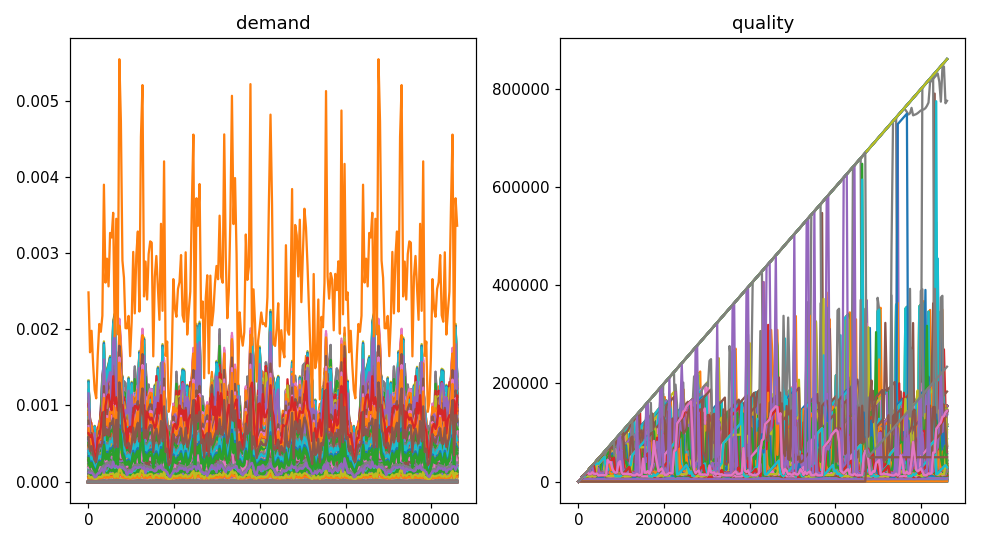

In [95]:
fig_1, ax_1 = plt.subplots(1,2, figsize=(9,5))
demand = results.node['demand'][toPlotNames[2]] # Junctions
quality = results.node['quality'][toPlotNames[2]] # Junctions
ax_1[0].plot(demand)
ax_1[0].set_title('demand')
ax_1[1].plot(quality)
ax_1[1].set_title('quality')
fig_1.tight_layout()



<IPython.core.display.Javascript object>


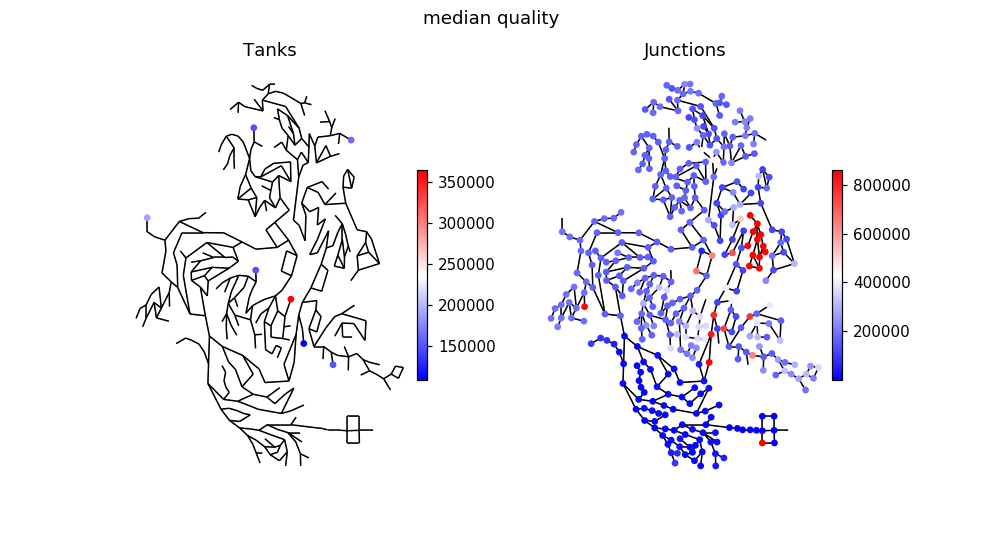

(<matplotlib.collections.PathCollection at 0x7fac425c4bd0>,
 <matplotlib.collections.LineCollection at 0x7fac425a5850>)

In [96]:
fig_2, ax_2 = plt.subplots(1,2, figsize=(9,5))
fig_2.suptitle('median quality', fontsize=12)
df = results.node['quality']
df_med = df.max()

wntr.graphics.plot_network(ctown.wn, node_attribute=df_med[toPlotNames[0]], node_cmap='bwr', title='Tanks', ax=ax_2[0])  # tanks
wntr.graphics.plot_network(ctown.wn, node_attribute=df_med[toPlotNames[2]], node_cmap='bwr', title='Junctions', ax=ax_2[1])  # junctions

<IPython.core.display.Javascript object>


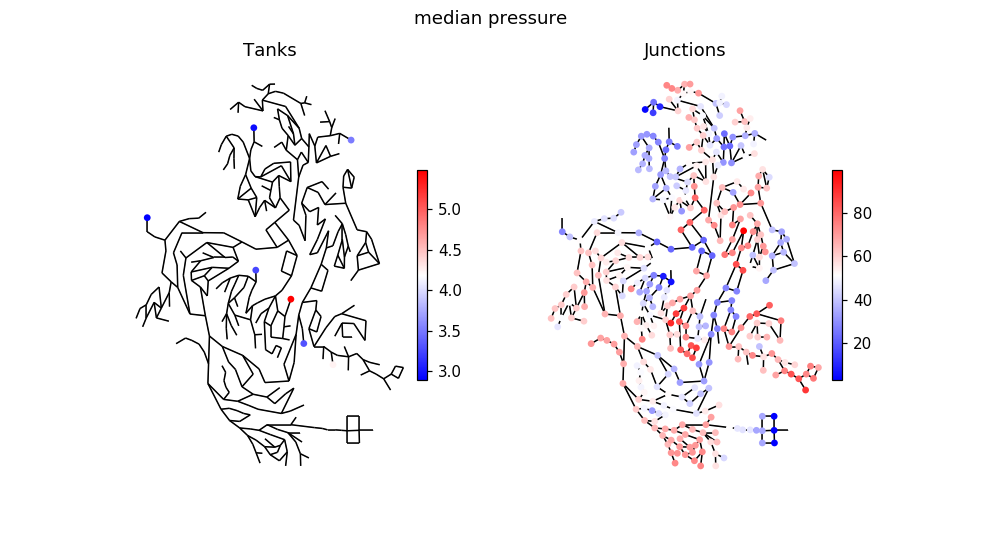

(<matplotlib.collections.PathCollection at 0x7fac4d923290>,
 <matplotlib.collections.LineCollection at 0x7fac4d89aed0>)

In [10]:
fig_3, ax_3 = plt.subplots(1,2, figsize=(9,5))
fig_3.suptitle('median pressure', fontsize=12)
df = results.node['pressure']
df_med = df.median()

wntr.graphics.plot_network(ctown.wn, node_attribute=df_med[toPlotNames[0]], node_cmap='bwr', title='Tanks', ax=ax_3[0])  # tanks
wntr.graphics.plot_network(ctown.wn, node_attribute=df_med[toPlotNames[2]], node_cmap='bwr', title='Junctions', ax=ax_3[1])  # junctions

## Links

In [11]:
results.link.keys()

dict_keys(['linkquality', 'flowrate', 'headloss', 'velocity', 'status', 'setting', 'frictionfact', 'rxnrate'])

### Pump 6

<IPython.core.display.Javascript object>


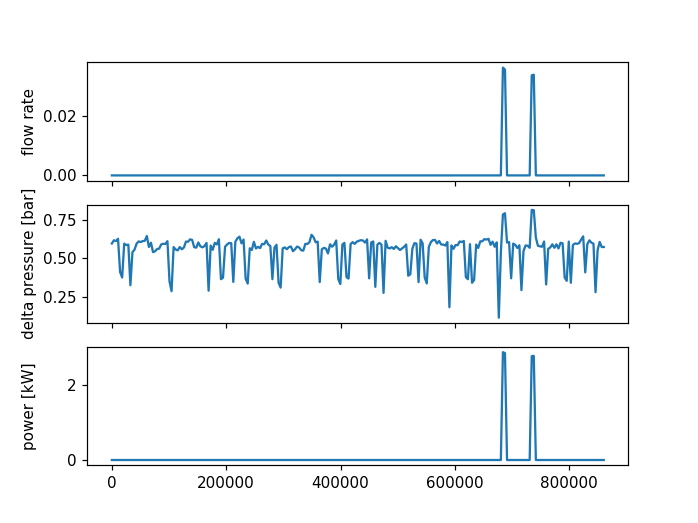

In [12]:
fig_4, ax_4 = plt.subplots(3,1, sharex=True)
v_6 = results.link['flowrate']['PU6']
dp_6 = (results.node['pressure']['J415']-results.node['pressure']['J289'])*1000
p_6 = v_6*dp_6
ax_4[0].plot(v_6)
ax_4[0].set_ylabel('flow rate')
ax_4[1].plot(dp_6/1e5)
ax_4[1].set_ylabel('delta pressure [bar]')
ax_4[2].plot(p_6/1000)
ax_4[2].set_ylabel('power [kW]')

fig_4.align_labels()

### Valve 45

<IPython.core.display.Javascript object>


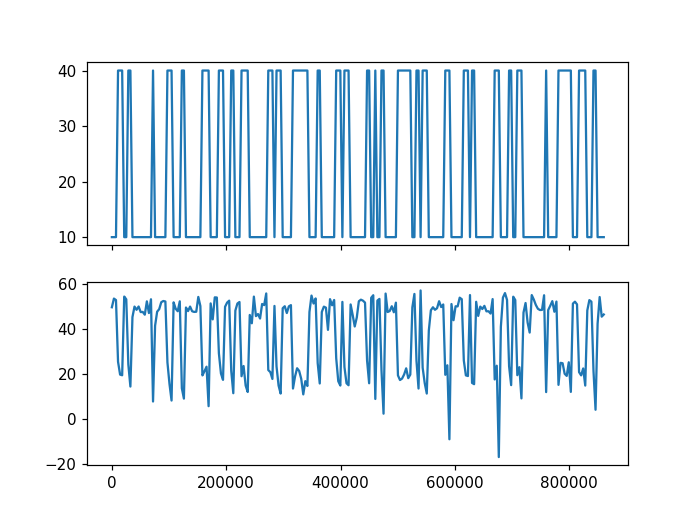

In [94]:
fig_5, ax_5 = plt.subplots(2,1, sharex=True)
ax_5[0].plot(results.link['setting']['V45'])
ax_5[1].plot(results.node['pressure']['J253']-results.node['pressure']['J130'])